In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('./train.csv')

In [26]:
df = pd.DataFrame(data)

In [27]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5372\3397469017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median, inplace=True)


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

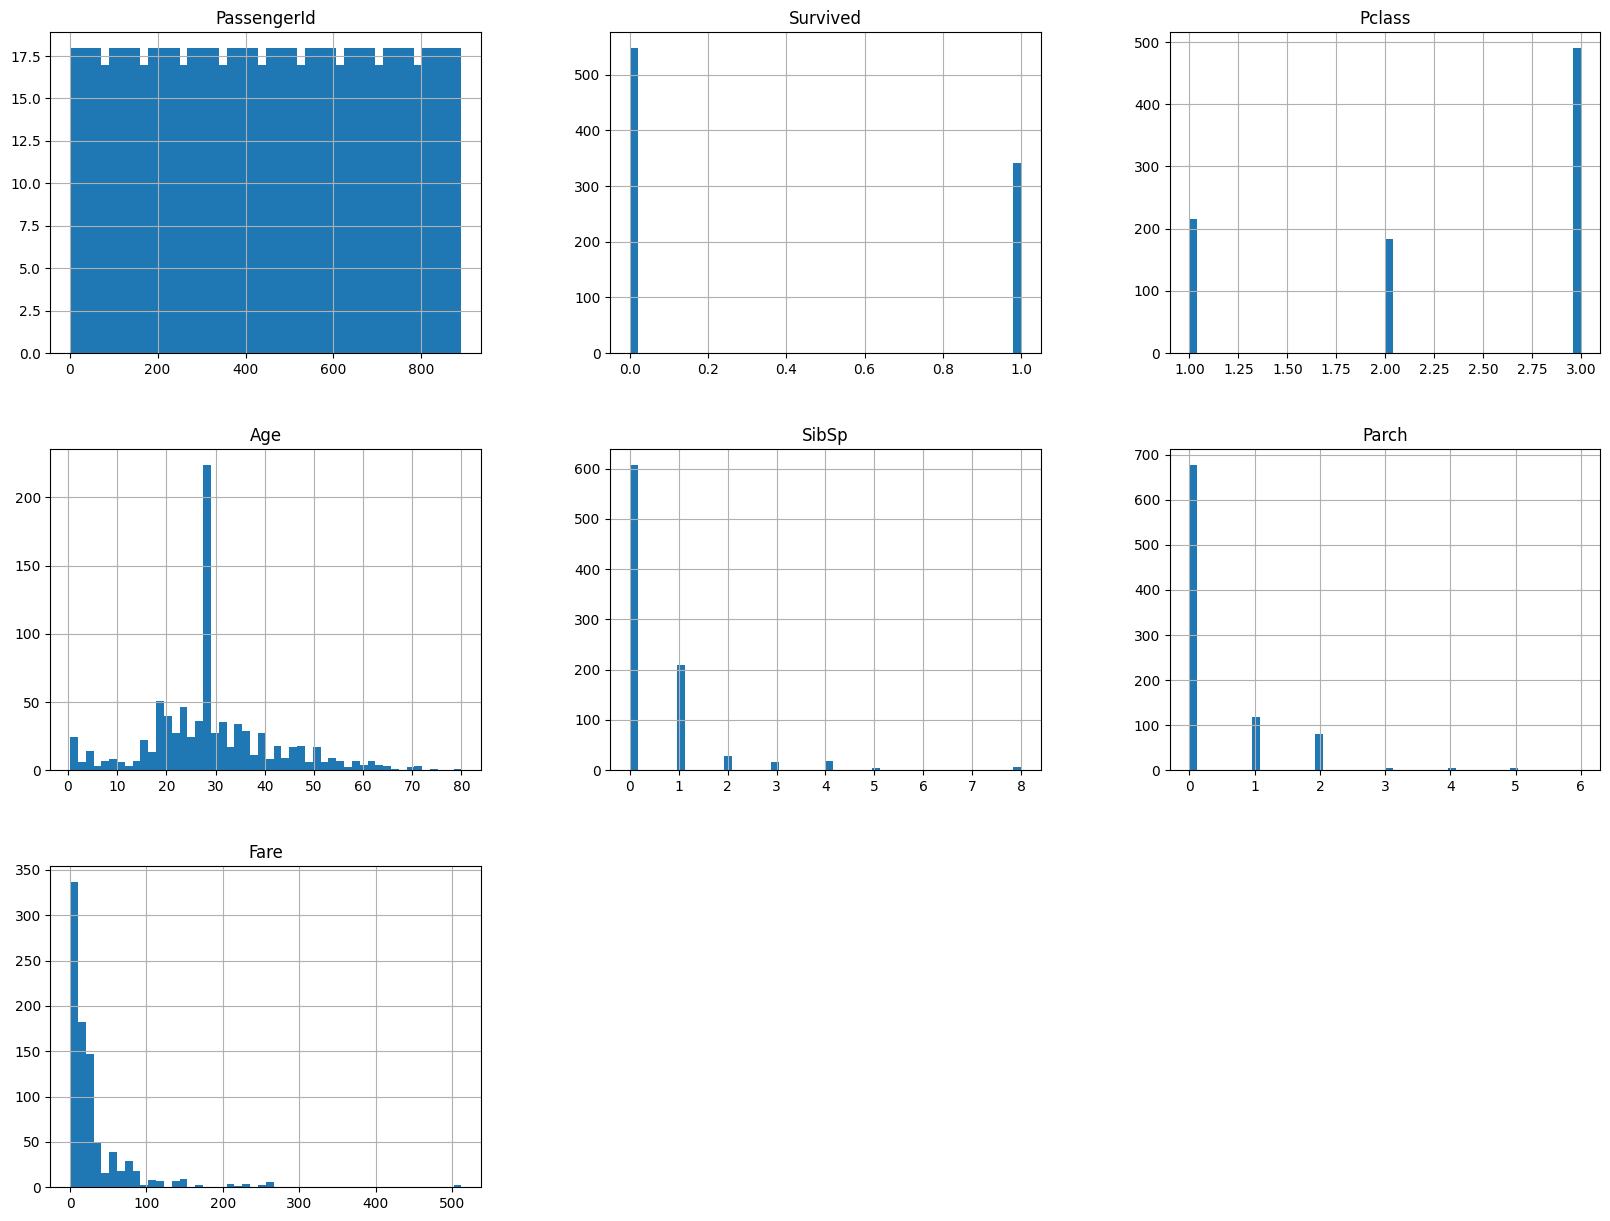

In [32]:
df.hist(bins=50, figsize=(20,15))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

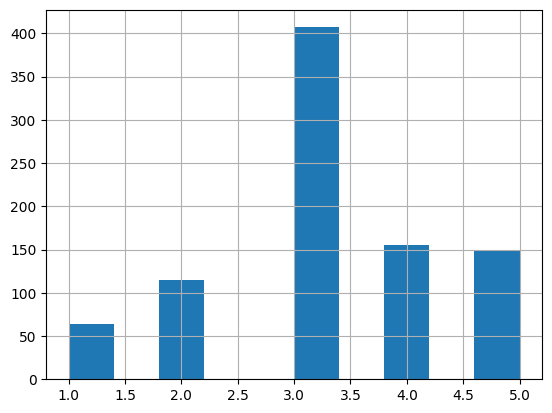

In [34]:
df['age_cat'] = pd.cut(df['Age'],
                       bins=[0,10.0,20.0,30.0,40.0,np.inf],
                       labels=[1,2,3,4,5])
df['age_cat'].hist()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index,test_index in split.split(df, df['age_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [38]:
strat_train_set['age_cat'].value_counts()/len(strat_train_set)

age_cat
3    0.456461
4    0.174157
5    0.168539
2    0.129213
1    0.071629
Name: count, dtype: float64

In [39]:
for col_ in (strat_train_set,strat_test_set):
    col_.drop('age_cat', axis = 1, inplace=True)

In [40]:
df = strat_train_set.copy()
df.shape

(712, 12)

In [42]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
387,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.000,NaN,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.000,NaN,S
168,169,0,1,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.925,NaN,S


In [50]:
droped_df = df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
df = droped_df.copy()

In [51]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
387,1,2,female,36.0,0,0,S
684,0,2,male,60.0,1,1,S
168,0,1,male,28.0,0,0,S


In [53]:
df_num = df.select_dtypes(include=['number'])
corr_matrix = df_num.corr()
corr_matrix['Survived'].sort_values(ascending=False)


Survived    1.000000
Parch       0.089358
SibSp      -0.054365
Age        -0.067264
Pclass     -0.346470
Name: Survived, dtype: float64